# Principle Component Analysis

Real-world data have high number of dimensions. In practice, working with these high dimensional data introduce some difficulties. First, having thousands or even millions of features makes training very slow. Second, it is difficult to visualise the data. Third, it may make finding a good solution much harder. For instance, in Nearest Neighbor algorithms the **sample complexity** (that is, how many examples are required to guarantee a probably approximately correct solution) increases exponentially with the dimension.

The term **curse of dimensionality** is used to describe certain issues that occurs when working with high-dimensional data. For example, the Euclidean distance between any two data points in high-dimensional hyperspace becomes more or less the same. This implies that high-dimensional datasets are more likely to be sparse which makes the distance between any two point to be very high. In theory, we could reach sufficient density by increasing the size of the dataset. However, as the number of features grows, the amount of data we need to obtain a statistically sound and reliable result i.e., to generalise accurately grows exponentially. In practice, this is intractable. With just 100 features, the size of the dataset would be $10^d=10^{100}$. This is more than the number of atoms in the observable universe: $10^{80}$.

High dimensional data has some nice properties. High dimensional data is often overcomplete. This means that many dimensions are redundant and can be explained by a combination of other dimensions. Dimensionality reduction exploits the structure and correlation of the data to extract a more compact representation of the data --- ideally without losing information. The lower dimensional representation of a high dimensional data point is sometimes called a **code**.

Dimensionality reduction can be used for interpretability of the data, for finding meaningful structure of the data, and for illustration purposes. In many real-world problems, it is possible to reduce the number of features without affecting performance significantly. There are two main approaches for reducing dimensionality:
- projection
- manifold learning

The projection approach assumes that the data points are **not** spread out uniformly across all dimensions. This means that some feature may be highly correlated. It is safe to combine highly correlated features or even drop one of them. In the figure, below we can reduce 2D data points into 1D data points with an acceptable loss of precision.

![SD](images/dim-reduce-2d-1d.png) [Source](http://www.holehouse.org/mlclass/14_Dimensionality_Reduction.html)

Other features may not vary much. It would be safe to ignore that feature. The figure below, shows an example of a dataset where the data points are sitting "inside" the blue tray.

![SD](images/dim-reduce-3d-2d.png) [Source](http://www.holehouse.org/mlclass/14_Dimensionality_Reduction.html)

Projection is not always the best approach. For example, if we projected the Swiss roll dataset into a 2D plane, we would squash different layers together. Instead, we want to unroll the Swiss roll in order to obtain the 2D dataset on the right (2D-manifold).

![SD](images/tenenbaum-swiss-roll-dataset.png) [Source](http://www.holehouse.org/mlclass/14_Dimensionality_Reduction.html)

PCA is a very popular dimensionality reduction algorithm that has two steps:
1. identify the hyperplane that lies closest to the data
2. project the data onto it

In step 1, we can choose the hyperplane that **maximises the amount of variance** or **minimises the mean squared distance** between the original dataset and its projection onto the plane. In the figure below, the top right projection preserves the maximum variance. 

![SD](images/choose-right-hyperplane.png) [Source](https://www.slideshare.net/ssuser77b8c6/handson-machine-learning-with-scikitlearn-and-tensorflow-chapter8?from_action=save)

PCA identifies the axis that accounts for the largest amount of variance in the dataset. The unit vector that describes this axis is called the 1st **principle component** (PC). Once PCA have found the first axis, it finds a second axis that is orthogonal to the first axis that accounts for the largest of amount of the remaining variances. In the 2D example above, the are no other choice than the dotted line.

## PCA in NumPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

Generate the dataset

In [27]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Plot the dataset

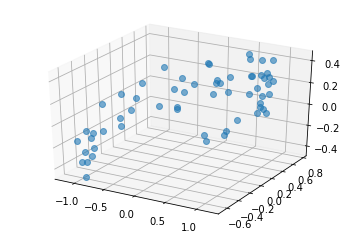

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "o", alpha=0.6)

Factorise the matrix using the Singular Value Decomposition (SVD): $X=U\Sigma V^T$

Note that principle components are defined from the origin so we need to the dataset around the origin.

In [20]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

The columns of $V^T$ represent the principle components.

In [9]:
Vt

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

To perform the projection, we compute the dot product of X by matrix $W_d$ which contains the first $d$ principle components:

\begin{equation*}
Y = X W_d 
\end{equation*}

In [26]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

Let us plot it on a 2D plane

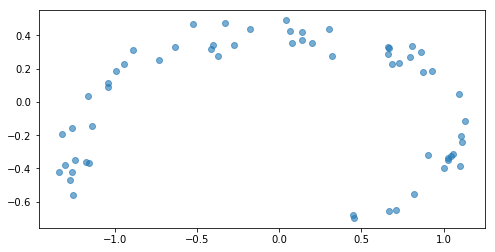

In [32]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X2D[:, 0], X2D[:, 1], "o", alpha=0.6)

Let us plot the original 3D dataset onto a 2D plane by ignoring the third dimension without PCA.

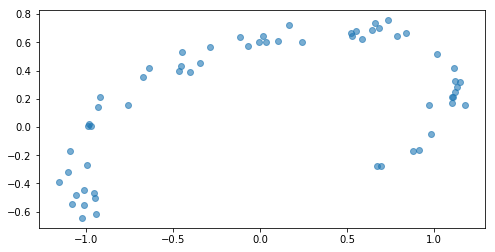

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X[:, 0], X[:, 1], "o", alpha=0.6)

Let us plot the 3D dataset ignoring the third dimension.

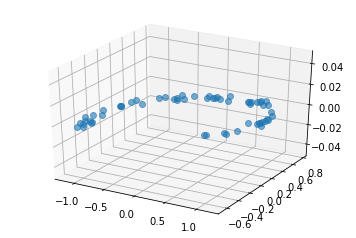

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], "o", alpha=0.6)

The `scikit-learn` provides `PCA` class that implements PCA using SVD.

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

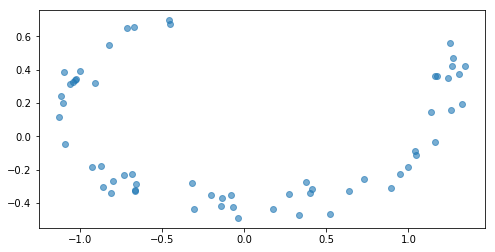

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X2D[:, 0], X2D[:, 1], "o", alpha=0.6)

The `explained_variance_ratio` of the PCA object describes the proportion of the dataset's variance that lies along the axis of each principle component.

In [38]:
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

The results show that 84% of dataset's variance lies on the first axis and around 15% along the second axis. Since the remaining variance is around 1%, it is safe to assume that it probably carries little information.